## Demonstrate data wrangling, and plot a horizontal bar chart

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data from a CSV file
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


### Data wrangling to reshape the pokemon dataframe

In [25]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)
pkmn_types.shape

(1614, 4)

### Find the frequency of unique values in the `type` column

In [26]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [27]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

### Plot the horizontal bar charts

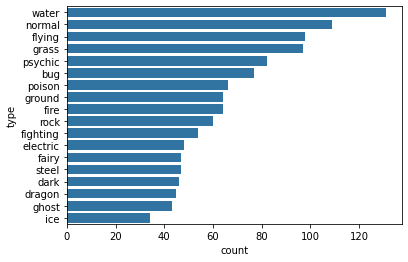

In [28]:
base_color = sns.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

## Plotting a bar chart having the proportions, instead of the actual count, on one of the axes.

### Find the maximum proportion of bar

In [29]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


### Create an array of evenly spaced proportioned values

In [30]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

### Create a list of String values that can be used as tick labels

In [31]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ["{:0.2f}".format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

### Plot the bar chart, with new x-tick labels

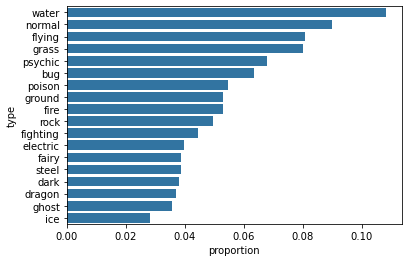

In [32]:
sns.countplot(y = 'type', data = pkmn_types, color = base_color, order = type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel("proportion");

## Print the text (proportion) on the bars of a horizontal plot

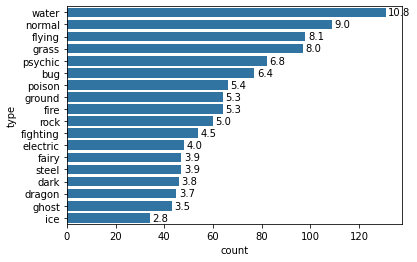

In [38]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

### Print the text (proportion) below the bars of a Vertical plot

In [42]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

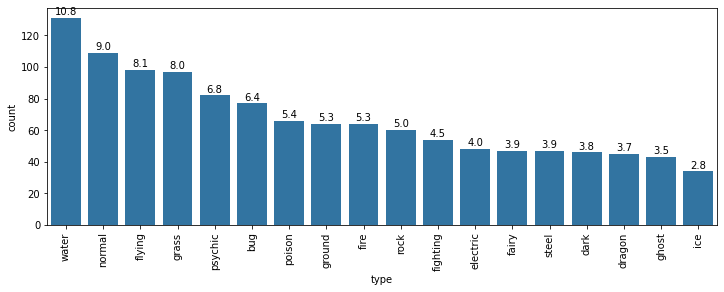

In [43]:
# Considering the same chart from the Example above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
sns.countplot(x = "type", data = pkmn_types, color = base_color, order = type_order);

# Recalculating the type_counts just to have clarity.
count_types = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = "{:0.1f}".format((count / n_pokemon) * 100)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count + 2, pct_string, ha = 'center', color = 'black')